CALISTA NABILA FIRGIAWAN || 202331143 || PM D

In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
data = pd.read_csv('CounterStrike.csv') # membaca dataset

In [67]:
label_encoder = LabelEncoder()
data['map'] = label_encoder.fit_transform(data['map'])
data['round_winner'] = label_encoder.fit_transform(data['round_winner']) # mengubah kategorikal menjadi numerik

In [69]:
data['bomb_planted'] = data['bomb_planted'].astype(int) # mengubah kategorikal menjadi numerik

In [71]:
X = data.drop(columns=['round_winner'])
y = data['round_winner'] # memisahkan fitur X dan label y

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # membagi data uji dan data latih

In [75]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # standarisasi

In [77]:
model = GaussianNB()
model.fit(X_train, y_train) # pemodelan data

GaussianNB()

In [79]:
y_pred = model.predict(X_test) # menguji data /memprediksi 

In [87]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model: {accuracy * 100:.2f}%")  # mengevaluasi data


Akurasi Model: 72.50%


In [85]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)  # mengevaluasi data


Confusion Matrix:
 [[161  76]
 [ 89 274]]


In [89]:
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)  # mengevaluasi data


Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.68      0.66       237
           1       0.78      0.75      0.77       363

    accuracy                           0.72       600
   macro avg       0.71      0.72      0.71       600
weighted avg       0.73      0.72      0.73       600



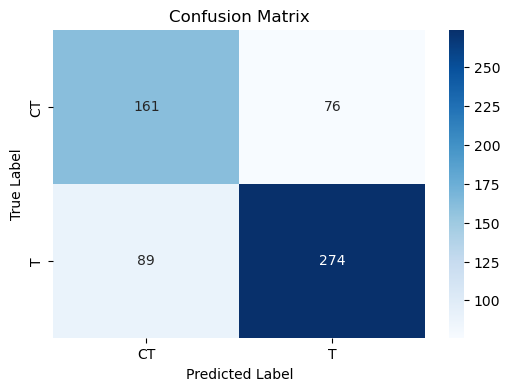

In [91]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['CT', 'T'], yticklabels=['CT', 'T'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()  # mevisualisasi data

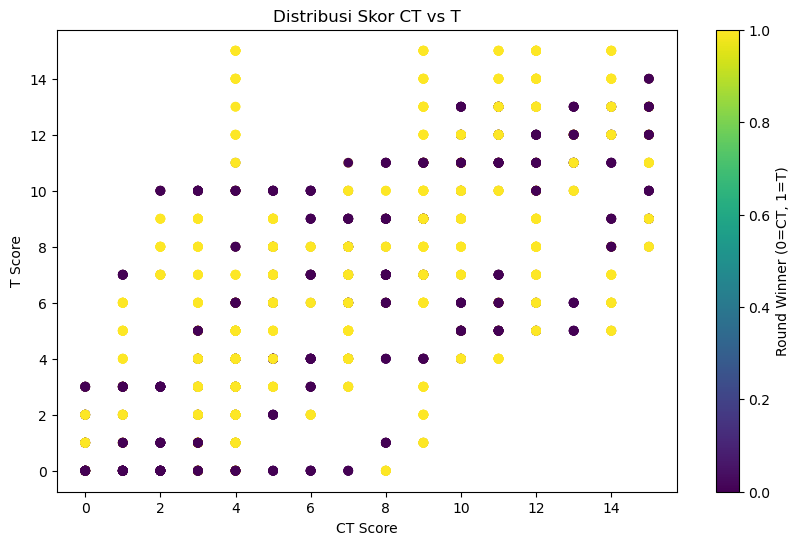

In [93]:
plt.figure(figsize=(10, 6))
plt.scatter(X['ct_score'], X['t_score'], c=y, cmap='viridis')
plt.title('Distribusi Skor CT vs T')
plt.xlabel('CT Score')
plt.ylabel('T Score')
plt.colorbar(label='Round Winner (0=CT, 1=T)')
plt.show()